In [2]:
# Data analysis and manipulation
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # this for styling
# data standardization and Modeling with K-means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [7]:
# importing the dataset
df=pd.read_csv("segmentation data.csv",index_col=0)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [8]:
#checking for decriptive statistics of the columns
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [9]:
# checking for columns and their respective data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


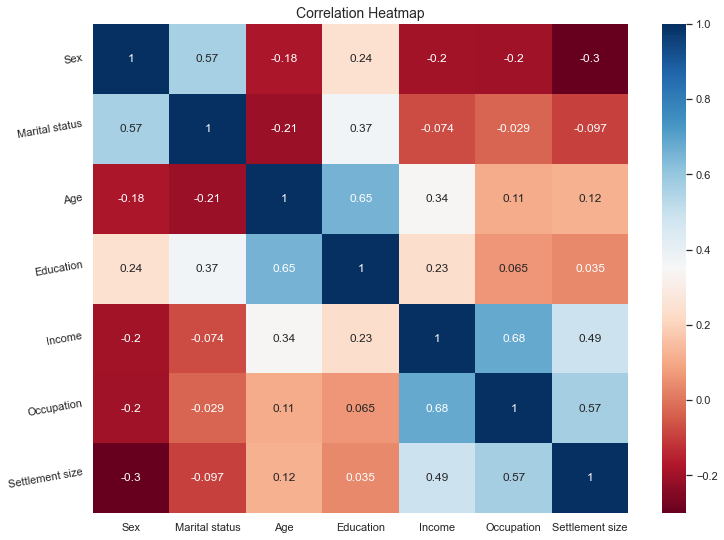

In [10]:
# looking at how the different variables correlate
# correlation matrix is a useful tool to help us understand how various variables relate
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap="RdBu")
plt.title("Correlation Heatmap",fontsize=14)
plt.yticks(rotation=10)
plt.show()

#### 1.we see that there is a high correlation between education and age meaning that people advanced in age tend to be more educated.
#### 2.there is also a high correlation between occupation and income. This means people earning higher income tend to be advanced in their occupation such as being in managerial positions.

# Data Preprocessing

In [14]:
# here we will be transforming the features before we apply segmentation algorithms.
# we want the values to range between [0:1]
scaler=StandardScaler()
df_std=scaler.fit_transform(df)


In [47]:
#converting the standardized data into dataframe
df_std=pd.DataFrame(data=df_std,columns=df.columns)
df_std.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [48]:
df_std1=df_std.copy()

# Applying our Segmentation Model
There are two clusters:
1.Within clusters sum of squares
2.Elbow Method

In [18]:
wcss=[]
for i in range (1,11):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(df_std)
    wcss.append(kmeans_pca.inertia_)

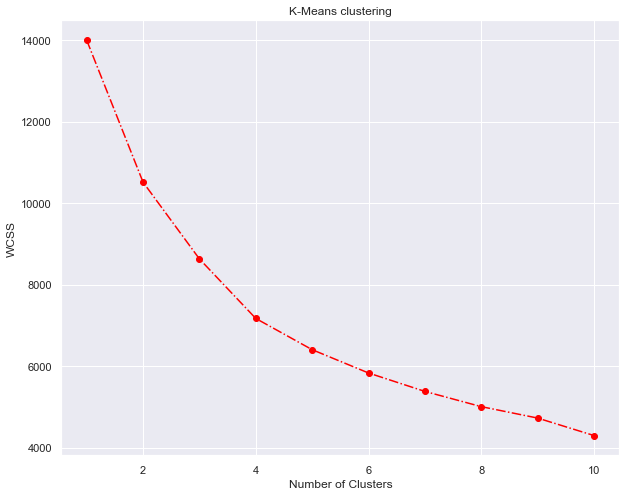

In [19]:
# visualizing
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means clustering')
plt.show()

The elbow in the graph is at 4.From there the graph starts smoothing out aftwerward. Therefore we will use 4 as our k-means

In [22]:
# performing k-means with 4 clusters
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)

In [23]:
# fitting our model to the dataset
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [26]:
# we create a new dataframe with originsl features and add a new column with the assigned clusters for each point
df_segm_kmeans=df_std.copy()
df_std['Segment K-Means']=kmeans.labels_
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-Means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [32]:
# grouping the customers by clusters and getting the average value of each variable
df_segm_analysis=df_std.groupby(['Segment K-Means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


# Interpretation of the segment analysis

1. The first segment is

In [33]:
#labelling the segments based on relevance
df_segm_analysis.rename({0:'well-off',
                        1:'fewer-opportunities',
                        2:'standard',
                        3:'career-focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-Means,,,,,,,
well-off,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
fewer-opportunities,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
standard,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
career-focused,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


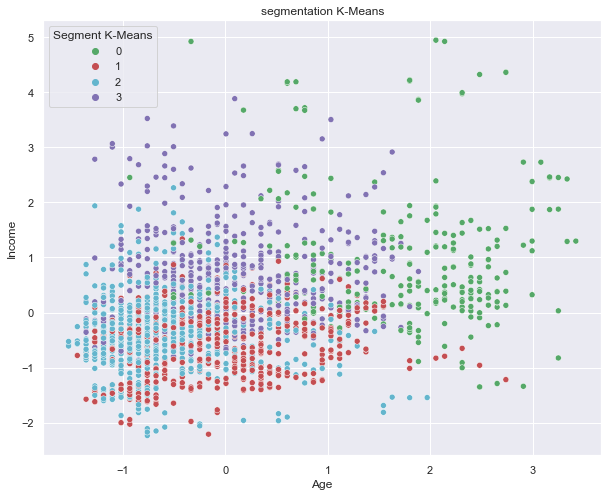

In [39]:
# creating plots to visualize the segments
x_axis=df_std['Age']
y_axix=df_std['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axix,hue=df_std['Segment K-Means'],palette=(['g','r','c','m']))
plt.title('segmentation K-Means')
plt.show()

 we can see that the green segment is clearly separated both in age and income. The other segments are clustered together.

# PCA with K-Means for better visualization

In [49]:
# we will apply dimension reduction so that we can achieve a clear plot of the segmented groups
pca=PCA()
pca.fit(df_std1)

PCA()

In [50]:
# explained variance ratio of each component
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

The first component explains 36% of the variability, the second component explains 26% of the variability etc.

Text(0, 0.5, 'Cumulative explained variance')

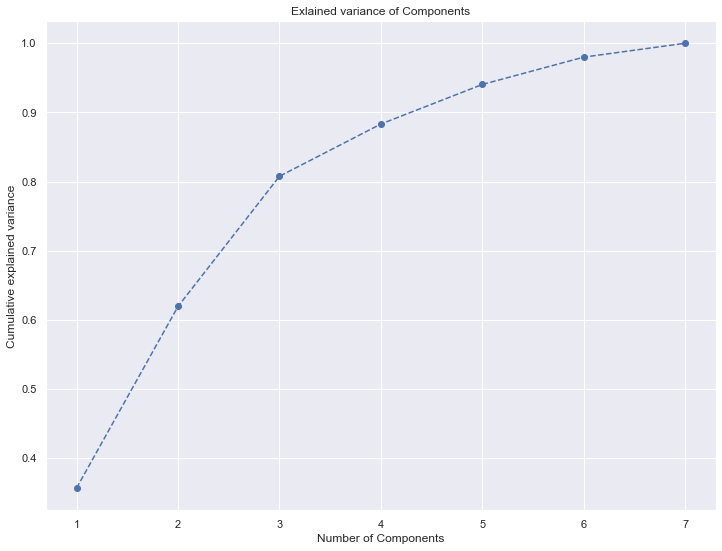

In [51]:
# plotting the cumulative sum of explained variance
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Exlained variance of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')

 We keep the components which explain 70-80% of the explained variance

In [52]:
pca=PCA(n_components=3)
pca.fit(df_std)
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [53]:
# putting the components in a pandas dataframe
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
              index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


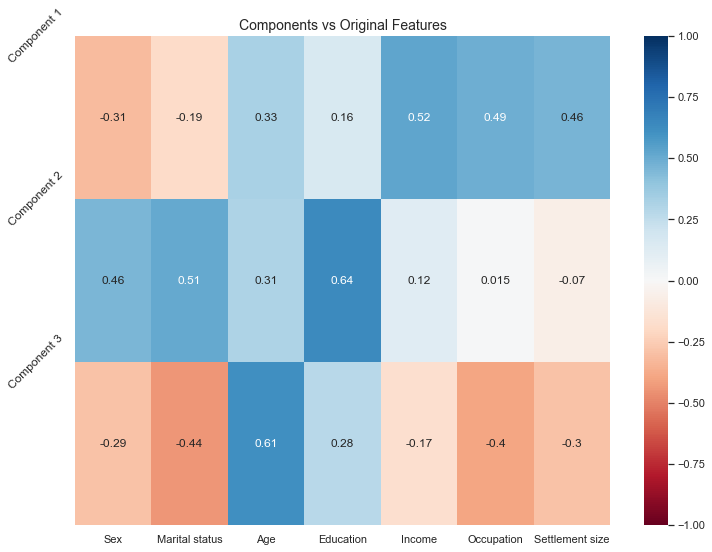

In [61]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [64]:
# transform data and store it in scores_pca
pca.transform(df_std1)
scores_pca=pca.transform(df_std1)

In [65]:
#kmeans clustering with pca
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [66]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)